In [29]:
# Load all dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as sm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
%matplotlib inline

In [6]:
data = pd.read_csv('/Users/larsboesch/Desktop/FS22/DataScience/project/datascience/workspace/regression/co2_pm25_deathrates_cleaned.csv')

In [12]:
data.drop(['Unnamed: 0'], axis=1)

,country,year,co2,co2_per_capita,"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number),rate Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)
0,Africa,1990,659.295,1.052,46.719096,169060,26.820034
1,Africa,1991,689.026,1.068,46.530559,173284,26.768455
2,Africa,1992,668.677,1.010,46.342022,177903,26.771976
3,Africa,1993,708.858,1.043,46.153485,183152,26.860278
4,Africa,1994,719.623,1.029,45.964949,188664,26.973370
...,...,...,...,...,...,...,...
107,North America,2013,6714.924,12.106,8.641443,70771,12.666808
108,North America,2014,6753.943,12.063,8.142226,68018,12.062615
109,North America,2015,6612.704,11.704,7.973350,66704,11.724851
110,North America,2016,6471.360,11.353,7.321048,64353,11.214949


In [50]:
africa = data.loc[data['country'] == 'Africa']
asia = data.loc[data['country'] == 'Asia']
europe = data.loc[data['country'] == 'Europe']
north_america = data.loc[data['country'] == 'North America']

In [61]:
x_param = 'co2'
y_param = 'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'
z_param = 'rate Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)'

In [62]:
# Regression for africa

df = pd.DataFrame({'x': africa[x_param],
                   'y': africa[y_param],
                   'z': africa[z_param]
                  })

# linear regression fit
reg = sm.ols(formula='z ~ x + y', data=df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     109.0
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           4.50e-13
Time:                        12:31:50   Log-Likelihood:                -15.637
No. Observations:                  28   AIC:                             37.27
Df Residuals:                      25   BIC:                             41.27
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3673      1.992      9.219      0.0

The fitting formula is: z = 18.367 + 0.006 x + 0.102 y


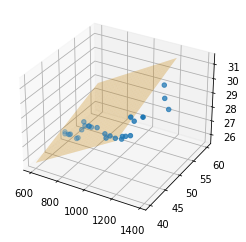

In [63]:
a0, a1, a2 = reg.params
print('The fitting formula is: z = {0:} + {1:} x + {2:} y'.format(round(a0, 3),round(a1, 3), round(a2, 3)))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(africa[x_param], africa[y_param], africa[z_param])

X = np.linspace(600, 1200, 1000)
Y = np.linspace(40, 60, 100)
XX, YY = np.meshgrid(X, Y)
ZZ = a0 + a1 * XX + a2 * YY
ax.plot_surface(XX, YY, ZZ, alpha=0.3, color='orange')

In [64]:
# Regression for asia

df = pd.DataFrame({'x': asia[x_param],
                   'y': asia[y_param],
                   'z': asia[z_param]
                  })

# linear regression fit
reg = sm.ols(formula='z ~ x + y', data=df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     449.0
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           2.57e-20
Time:                        12:31:51   Log-Likelihood:                -55.370
No. Observations:                  28   AIC:                             116.7
Df Residuals:                      25   BIC:                             120.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.3623      8.259      3.676      0.0

The fitting formula is: z = 30.362 + 0.002 x + -0.103 y


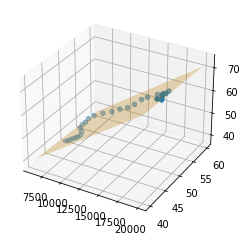

In [65]:
a0, a1, a2 = reg.params
print('The fitting formula is: z = {0:} + {1:} x + {2:} y'.format(round(a0, 3),round(a1, 3), round(a2, 3)))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(asia[x_param], asia[y_param], asia[z_param])

X = np.linspace(6000, 20000, 10000)
Y = np.linspace(40, 60, 1000)
XX, YY = np.meshgrid(X, Y)
ZZ = a0 + a1 * XX + a2 * YY
ax.plot_surface(XX, YY, ZZ, alpha=0.3, color='orange')

In [66]:
# Regression for europe

df = pd.DataFrame({'x': europe[x_param],
                   'y': europe[y_param],
                   'z': europe[z_param]
                  })

# linear regression fit
reg = sm.ols(formula='z ~ x + y', data=df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     93.34
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           2.53e-12
Time:                        12:31:52   Log-Likelihood:                -72.833
No. Observations:                  28   AIC:                             151.7
Df Residuals:                      25   BIC:                             155.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.8044      8.342     -4.292      0.0

The fitting formula is: z = -35.804 + -0.004 x + 8.19 y


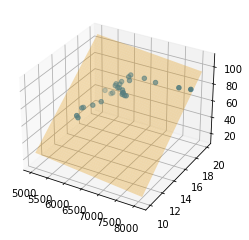

In [67]:
a0, a1, a2 = reg.params
print('The fitting formula is: z = {0:} + {1:} x + {2:} y'.format(round(a0, 3),round(a1, 3), round(a2, 3)))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(europe[x_param], europe[y_param], europe[z_param])

X = np.linspace(5000, 8100, 1000)
Y = np.linspace(10, 20, 1000)
XX, YY = np.meshgrid(X, Y)
ZZ = a0 + a1 * XX + a2 * YY
ax.plot_surface(XX, YY, ZZ, alpha=0.3, color='orange')

In [68]:
# Regression for north america


df = pd.DataFrame({'x': north_america[x_param],
                   'y': north_america[y_param],
                   'z': north_america[z_param]
                  })

# linear regression fit
reg = sm.ols(formula='z ~ x + y', data=df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     24.40
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           1.33e-06
Time:                        12:31:52   Log-Likelihood:                -70.256
No. Observations:                  28   AIC:                             146.5
Df Residuals:                      25   BIC:                             150.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.6323     12.053     -0.301      0.7

The fitting formula is: z = -3.632 + -0.005 x + 6.199 y


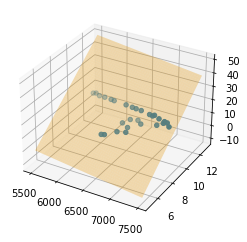

In [71]:
a0, a1, a2 = reg.params
print('The fitting formula is: z = {0:} + {1:} x + {2:} y'.format(round(a0, 3),round(a1, 3), round(a2, 3)))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(north_america[x_param], north_america[y_param], north_america[z_param])

X = np.linspace(5500, 7500, 1000)
Y = np.linspace(5, 13, 1000)
XX, YY = np.meshgrid(X, Y)
ZZ = a0 + a1 * XX + a2 * YY
ax.plot_surface(XX, YY, ZZ, alpha=0.3, color='orange')